In [1]:
import pandas as pd
import itertools
import statsmodels.api as sm
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
##Hide all warnings
import warnings
warnings.filterwarnings('ignore')

## Question 1
#### Data set link : https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

In [2]:
file = 'data.csv'
path = os.path.abspath(file)

In [3]:
print(path)

C:\Users\M ZOHAIB HASSAN\Desktop\data.csv


In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
#Independant Variables
X = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
#Dependent variables
y = ['DEATH_EVENT']

#### Findng correlations

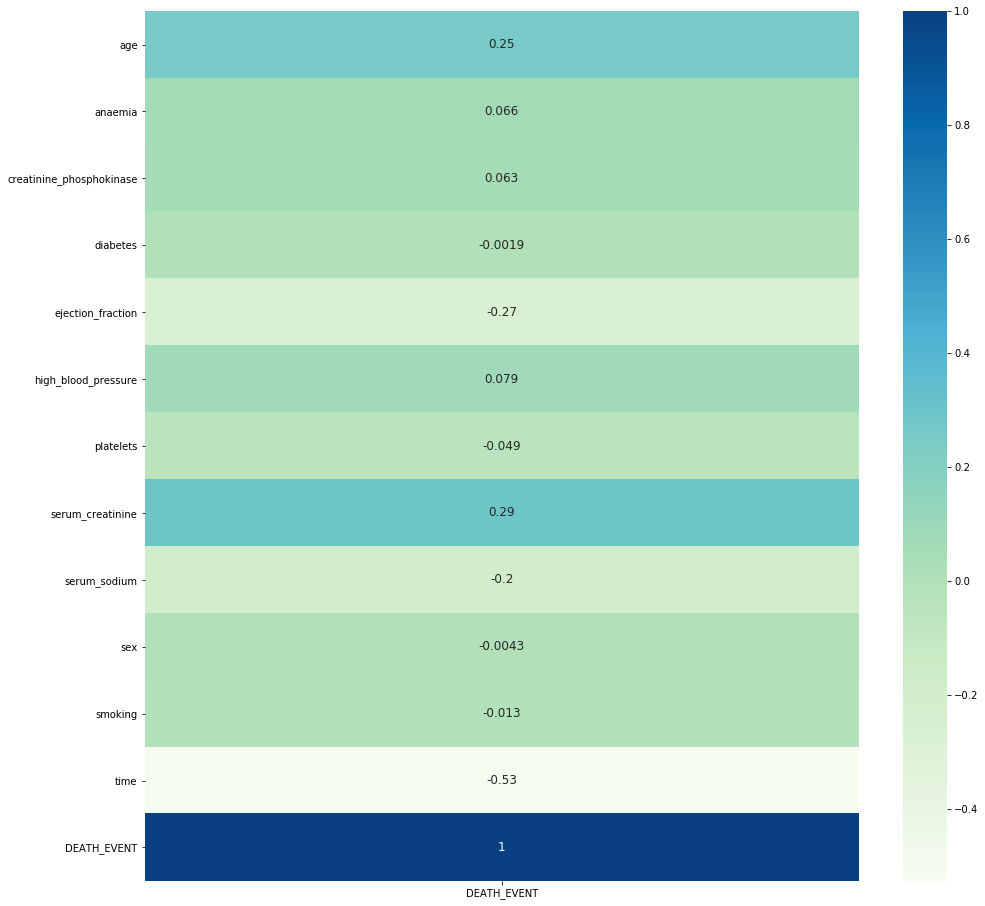

In [8]:
correlation = df.corr()['DEATH_EVENT']
fig, ax = plt.subplots(figsize=(16,16))
#plot matrix
sns.heatmap(correlation.to_frame(),annot=True, annot_kws={'size':12},cmap="GnBu")
plt.show();

In [9]:
correlation.nlargest(4)

DEATH_EVENT            1.000000
serum_creatinine       0.294278
age                    0.253729
high_blood_pressure    0.079351
Name: DEATH_EVENT, dtype: float64

In [10]:
##Since Death Event is found to be highly correlated with above three so we take above three attributes

In [11]:
X = ['serum_creatinine','age','high_blood_pressure']
col_pairs = [list(zip(x,y)) for x in itertools.permutations(X,len(y))]
col_pairs

[[('serum_creatinine', 'DEATH_EVENT')],
 [('age', 'DEATH_EVENT')],
 [('high_blood_pressure', 'DEATH_EVENT')]]

In [12]:
models = []
for val in col_pairs:
    model = sm.OLS(df[val[0][0]],df[val[0][1]]).fit()
    models.append(model)

In [13]:
summary = []
for i in range(len(models)):
    summary.append(models[i].summary())

#### Results

In [14]:
summary[0]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       serum_creatinine   R-squared (uncentered):                   0.360
Model:                            OLS   Adj. R-squared (uncentered):              0.357
Method:                 Least Squares   F-statistic:                              167.3
Date:                Wed, 26 Aug 2020   Prob (F-statistic):                    1.12e-30
Time:                        10:41:29   Log-Likelihood:                         -522.36
No. Observations:                 299   AIC:                                      1047.
Df Residuals:                     298   BIC:                                      1050.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
DEATH_EVENT     1.8358      0.142     12.935      0.000       1.557       2.115
==============================================================================
Omnibus:                      147.499   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1166.304
Skew:                           1.851   Prob(JB):                    5.50e-254
Kurtosis:                      11.939   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
summary[1]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    age   R-squared (uncentered):                   0.355
Model:                            OLS   Adj. R-squared (uncentered):              0.353
Method:                 Least Squares   F-statistic:                              164.3
Date:                Wed, 26 Aug 2020   Prob (F-statistic):                    2.93e-30
Time:                        10:41:29   Log-Likelihood:                         -1592.5
No. Observations:                 299   AIC:                                      3187.
Df Residuals:                     298   BIC:                                      3191.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
DEATH_EVENT    65.2153      5.087     12.819      0.000      55.204      75.227
==============================================================================
Omnibus:                       59.954   Durbin-Watson:                   0.444
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.388
Skew:                          -0.673   Prob(JB):                     5.62e-08
Kurtosis:                       2.069   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
summary[2]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     high_blood_pressure   R-squared (uncentered):                   0.151
Model:                             OLS   Adj. R-squared (uncentered):              0.148
Method:                  Least Squares   F-statistic:                              52.96
Date:                 Wed, 26 Aug 2020   Prob (F-statistic):                    3.04e-12
Time:                         10:41:29   Log-Likelihood:                         -243.36
No. Observations:                  299   AIC:                                      488.7
Df Residuals:                      298   BIC:                                      492.4
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
DEATH_EVENT     0.4062      0.056      7.277      0.000       0.296       0.516
==============================================================================
Omnibus:                      137.760   Durbin-Watson:                   1.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.070
Skew:                           0.476   Prob(JB):                     8.03e-07
Kurtosis:                       1.840   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Question 2
#### Data set link https://www.kaggle.com/ronitf/heart-disease-uci

In [17]:
path = os.path.abspath('heart.csv')

In [18]:
path

'C:\\Users\\M ZOHAIB HASSAN\\Desktop\\heart.csv'

In [19]:
df = df = pd.read_csv(path)

<ul>
    <li>age: The person's age in years</li>
    <li>sex: The person's sex (1 = male, 0 = female)</li>

<li>cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)</li>
    <li>trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)</li>
<li>chol: The person's cholesterol measurement in mg/dl</li>
    <li>fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)</li>
<li>restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)</li>
<li>thalach: The person's maximum heart rate achieved</li>
    <li>exang: Exercise induced angina (1 = yes; 0 = no)</li>
<li>oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)</li>
<li>slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)</li>
    <li>ca: The number of major vessels (0-3)</li>
<li>thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)</li>
    <li>target: Heart disease (0 = no, 1 = yes)</li>
</ul>

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [22]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [23]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [24]:
##Learning dataset
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']]

In [25]:
##Target Variable
y = df[['target']]

In [26]:
## Splitting data set
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=5)

### Logistic Regression (LR)

In [27]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [28]:
print('The score for this model is:',sklearn.metrics.accuracy_score(y_test,y_pred))

The score for this model is: 0.9180327868852459


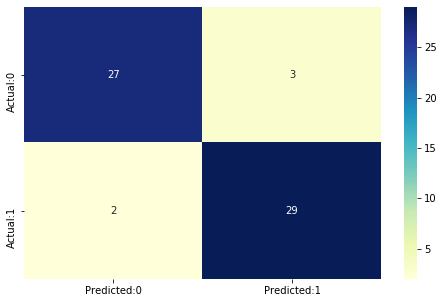

In [29]:
## Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [30]:
#Model Satistics
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [31]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9180327868852459 
 The Missclassification = 1-Accuracy =  0.08196721311475408 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9354838709677419 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9 
 Positive Predictive value = TP/(TP+FP) =  0.90625 
 Negative predictive Value = TN/(TN+FN) =  0.9310344827586207 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  9.354838709677422 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.07168458781362012


## Naïve Bayes (NB)

In [32]:
model_NB = GaussianNB() #Naive Baye's Model
model_NB.fit(x_train,y_train)
y_pred=model_NB.predict(x_test)

In [33]:
print('The score for this model is:',sklearn.metrics.accuracy_score(y_test,y_pred))

The score for this model is: 0.8688524590163934


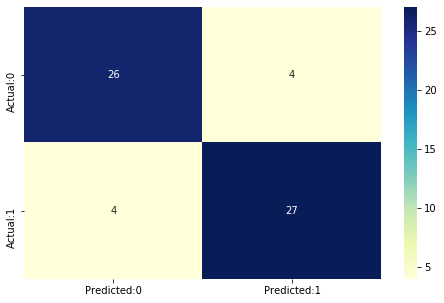

In [34]:
## Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [35]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [36]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8688524590163934 
 The Missclassification = 1-Accuracy =  0.1311475409836066 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.8709677419354839 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.8666666666666667 
 Positive Predictive value = TP/(TP+FP) =  0.8709677419354839 
 Negative predictive Value = TN/(TN+FN) =  0.8666666666666667 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  6.532258064516131 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.1488833746898263


### Linear Discriminant Analysis (LDA)

In [37]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(x_train,y_train)
y_pred=model_lda.predict(x_test)

In [38]:
print('The score for this model is:',sklearn.metrics.accuracy_score(y_test,y_pred))

The score for this model is: 0.9016393442622951


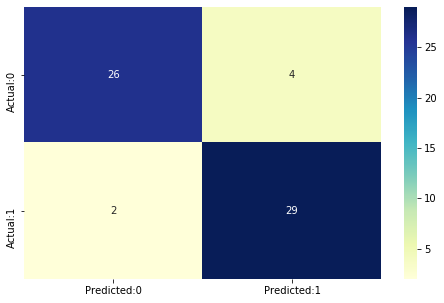

In [39]:
## Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [40]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [41]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9016393442622951 
 The Missclassification = 1-Accuracy =  0.09836065573770492 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9354838709677419 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.8666666666666667 
 Positive Predictive value = TP/(TP+FP) =  0.8787878787878788 
 Negative predictive Value = TN/(TN+FN) =  0.9285714285714286 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  7.016129032258066 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.07444168734491322


### Quadratic Discriminant Analysis (QDA)

In [42]:
model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(x_train,y_train)
y_pred=model_lda.predict(x_test)

In [43]:
print('The score for this model is:',sklearn.metrics.accuracy_score(y_test,y_pred))

The score for this model is: 0.9016393442622951


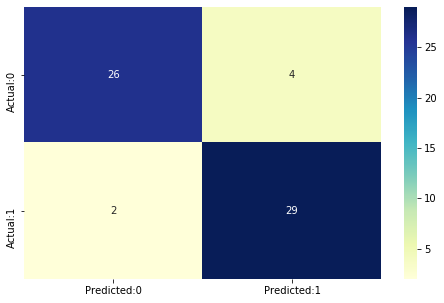

In [44]:
## Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [45]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9016393442622951 
 The Missclassification = 1-Accuracy =  0.09836065573770492 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9354838709677419 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.8666666666666667 
 Positive Predictive value = TP/(TP+FP) =  0.8787878787878788 
 Negative predictive Value = TN/(TN+FN) =  0.9285714285714286 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  7.016129032258066 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.07444168734491322


### k Nearest Neighbors (kNN)

In [46]:
model_knn = KNeighborsClassifier(n_neighbors=3,algorithm='kd_tree',leaf_size=5)
model_knn.fit(x_train, y_train)
y_pred=model_knn.predict(x_test)

In [47]:
print('The score for this model is:',sklearn.metrics.accuracy_score(y_test,y_pred))

The score for this model is: 0.6229508196721312


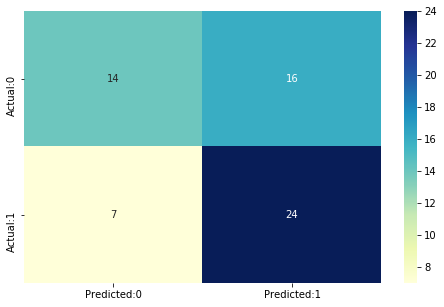

In [48]:
## Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [49]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9016393442622951 
 The Missclassification = 1-Accuracy =  0.09836065573770492 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9354838709677419 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.8666666666666667 
 Positive Predictive value = TP/(TP+FP) =  0.8787878787878788 
 Negative predictive Value = TN/(TN+FN) =  0.9285714285714286 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  7.016129032258066 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.07444168734491322


## Support Vector Machines (SVM)

In [50]:
model_svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model_svm.fit(x_train, y_train)
y_pred=model_svm.predict(x_test)

In [51]:
print('The score for this model is:',sklearn.metrics.accuracy_score(y_test,y_pred))

The score for this model is: 0.8524590163934426


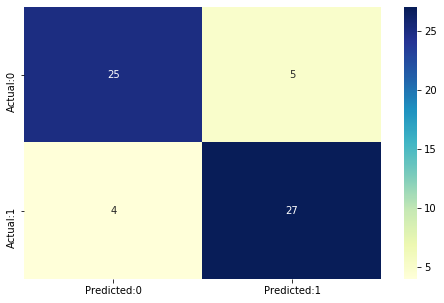

In [52]:
## Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [53]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9016393442622951 
 The Missclassification = 1-Accuracy =  0.09836065573770492 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9354838709677419 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.8666666666666667 
 Positive Predictive value = TP/(TP+FP) =  0.8787878787878788 
 Negative predictive Value = TN/(TN+FN) =  0.9285714285714286 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  7.016129032258066 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.07444168734491322


## Decision Trees (DT)

In [54]:
model_dtc = tree.DecisionTreeClassifier()
model_dtc.fit(x_train, y_train)
y_pred=model_dtc.predict(x_test)

In [55]:
print('The score for this model is:',sklearn.metrics.accuracy_score(y_test,y_pred))

The score for this model is: 0.8032786885245902


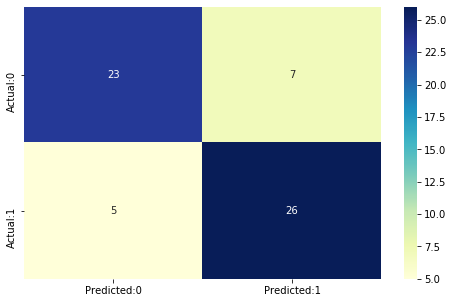

In [56]:
## Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [57]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9016393442622951 
 The Missclassification = 1-Accuracy =  0.09836065573770492 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9354838709677419 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.8666666666666667 
 Positive Predictive value = TP/(TP+FP) =  0.8787878787878788 
 Negative predictive Value = TN/(TN+FN) =  0.9285714285714286 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  7.016129032258066 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.07444168734491322
